In [21]:
import os
import nltk
import json
import pandas as pd
from path import Path
%matplotlib inline
from newsapi import NewsApiClient
# Download/Update the VADER Lexicon
nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/sandranomo/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [22]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# News Headlines Sentiment

Use the news api to pull the latest news articles for bitcoin and ethereum and create a DataFrame of sentiment scores for each coin. 

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [23]:
# Read your api key environment variable
api_key = os.getenv("news_api")

In [24]:
# Create a newsapi client
from newsapi import NewsApiClient

In [25]:
newsapi = NewsApiClient(api_key=api_key)

In [26]:
# Fetch the Bitcoin news articles

btc_headlines = newsapi.get_everything(q="Bitcoin", language="en", sort_by="relevancy")

In [27]:
# Fetch the Ethereum news articles
eth_headlines = newsapi.get_everything(q="ethereum", language="en", sort_by="relevancy"
)


In [28]:
# Create the Bitcoin sentiment scores DataFrame
sentiments = []

for articles in btc_headlines["articles"]:
    try:
        text = articles["content"]
        results = analyzer.polarity_scores(text)
        compound = results["compound"]
        pos = results["pos"]
        neu = results["neu"]
        neg = results["neg"]

        sentiments.append({
            "text": text,
            "Compound": compound,
            "Positive": pos,
            "Negative": neu,
            "Neutral": neg,
        })
    except AttributeError:
        pass
    
btc  = pd.DataFrame(sentiments)
btc.head()

,text,Compound,Positive,Negative,Neutral
0,Less than two miles from Icelands Reykjavik ai...,-0.1531,0.000,0.961,0.039
1,"Whether Bitcoin, an immaterial resource derive...",0.2999,0.104,0.796,0.100
2,High school students in France may be among th...,0.0000,0.000,1.000,0.000
3,TL;DR: The in-depth Complete Blockchain and Et...,0.4404,0.059,0.941,0.000
4,Our robot colleague Satoshi Nakaboto writes ab...,0.5070,0.069,0.931,0.000


In [29]:
# Create the ethereum sentiment scores DataFrame
sentiments = []

for articles in eth_headlines["articles"]:
    try:
        text = articles["content"]
        results = analyzer.polarity_scores(text)
        compound = results["compound"]
        pos = results["pos"]
        neu = results["neu"]
        neg = results["neg"]

        sentiments.append({
            "text": text,
            "Compound": compound,
            "Positive": pos,
            "Negative": neu,
            "Neutral": neg,
        })
    except AttributeError:
        pass
    
eth  = pd.DataFrame(sentiments)
eth.head()

,text,Compound,Positive,Negative,Neutral
0,Sharding and scalability. Transactions per sec...,0.3595,0.055,0.945,0.000
1,TL;DR: The in-depth Complete Blockchain and Et...,0.4404,0.059,0.941,0.000
2,Disrupt Berlin is right around the corner. And...,0.6249,0.100,0.900,0.000
3,"he plaBy now, you should almost certainly know...",0.4601,0.085,0.915,0.000
4,Blockchain has been picking up the pace since ...,-0.3089,0.000,0.945,0.055


In [30]:
# Describe the Bitcoin Sentiment
btc.describe()

,Compound,Positive,Negative,Neutral
count,19.000000,19.000000,19.000000,19.000000
mean,0.418574,0.066737,0.923211,0.010053
std,0.246495,0.036244,0.046020,0.026146
min,-0.153100,0.000000,0.796000,0.000000
25%,0.370150,0.066500,0.916500,0.000000
50%,0.507000,0.068000,0.932000,0.000000
75%,0.516850,0.073000,0.933000,0.000000
max,0.816600,0.143000,1.000000,0.100000


In [31]:
# Describe the Ethereum Sentiment
eth.describe()

,Compound,Positive,Negative,Neutral
count,20.000000,20.000000,20.000000,20.00000
mean,0.263495,0.055750,0.930300,0.01400
std,0.331478,0.044521,0.053072,0.02931
min,-0.440400,0.000000,0.738000,0.00000
25%,0.169725,0.031500,0.924750,0.00000
50%,0.359500,0.055000,0.942000,0.00000
75%,0.464250,0.075250,0.948750,0.00000
max,0.690800,0.173000,1.000000,0.09000


### Questions:

Q: Which coin had the highest mean positive score?

Answer: The coin with the highest mean positive score was Ethereum by 10.000000



Q: Which coin had the highest compound score?

Answer:  The coin with the highest compound was Bitcoin.


Q. Which coin had the highest positive score?



Answer: The coin with the highest Positive score was Bicotin.

---

# Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word
2. Remove Punctuation
3. Remove Stopwords

In [32]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [33]:
# Expand the default stopwords list if necessary
#https://www.pybloggers.com/2017/10/text-analytics-and-visualization/
wnl = WordNetLemmatizer() 
stop = stopwords.words('english')
stop.append("u")
stop.append("it'")
stop.append("'s")
stop.append("n't")
stop.append('…')
stop.append("\`")
stop.append('``')
stop.append('char')
stop.append("''")
stop = set(stop)

In [34]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    # Create a list of the words
    words = word_tokenize(text)

    # Convert the words to lowercase
    words = list(filter(lambda w: w.lower(), words))
    
    # Remove the punctuation
    words = list(filter(lambda t: t not in punctuation, words))
    
    # Remove the stopwords
    words = list(filter(lambda t: t.lower() not in stop, words))
    
    # Lemmatize Words into root words
    tokens = [wnl.lemmatize(word) for word in words]
    
    return tokens


In [35]:
# Create a new tokens column for bitcoin
btc["tokens"] = btc.text.apply(tokenizer)
btc.head()

,text,Compound,Positive,Negative,Neutral,tokens
0,Less than two miles from Icelands Reykjavik ai...,-0.1531,0.000,0.961,0.039,"[Less, two, mile, Icelands, Reykjavik, airport..."
1,"Whether Bitcoin, an immaterial resource derive...",0.2999,0.104,0.796,0.100,"[Whether, Bitcoin, immaterial, resource, deriv..."
2,High school students in France may be among th...,0.0000,0.000,1.000,0.000,"[High, school, student, France, may, among, fi..."
3,TL;DR: The in-depth Complete Blockchain and Et...,0.4404,0.059,0.941,0.000,"[TL, DR, in-depth, Complete, Blockchain, Ether..."
4,Our robot colleague Satoshi Nakaboto writes ab...,0.5070,0.069,0.931,0.000,"[robot, colleague, Satoshi, Nakaboto, writes, ..."


In [36]:
# Create a new tokens column for ethereum
eth["tokens"] = eth.text.apply(tokenizer)
eth.head()

,text,Compound,Positive,Negative,Neutral,tokens
0,Sharding and scalability. Transactions per sec...,0.3595,0.055,0.945,0.000,"[Sharding, scalability, Transactions, per, sec..."
1,TL;DR: The in-depth Complete Blockchain and Et...,0.4404,0.059,0.941,0.000,"[TL, DR, in-depth, Complete, Blockchain, Ether..."
2,Disrupt Berlin is right around the corner. And...,0.6249,0.100,0.900,0.000,"[Disrupt, Berlin, right, around, corner, plent..."
3,"he plaBy now, you should almost certainly know...",0.4601,0.085,0.915,0.000,"[plaBy, almost, certainly, know, Ethereum, ETH..."
4,Blockchain has been picking up the pace since ...,-0.3089,0.000,0.945,0.055,"[Blockchain, picking, pace, since, inception, ..."


---

# NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [37]:
from collections import Counter
from nltk import ngrams

In [38]:
# Generate the Bitcoin N-grams where N=2
N = 2
grams = ngrams(tokenizer(btc.text.str.cat()), N)
Counter(grams).most_common(20)

[(('Satoshi', 'Nakaboto'), 26),
 (('char', 'robot'), 13),
 (('robot', 'colleague'), 13),
 (('colleague', 'Satoshi'), 13),
 (('Nakaboto', 'writes'), 13),
 (('writes', 'Bitcoin'), 13),
 (('every', 'fucking'), 13),
 (('fucking', 'day'), 13),
 (('day', 'Welcome'), 13),
 (('Welcome', 'another'), 13),
 (('another', 'edition'), 13),
 (('edition', 'Bitcoin'), 13),
 (('Bitcoin', 'Today'), 13),
 (('Today', 'Satoshi'), 13),
 (('Nakaboto', 'tell'), 13),
 (('tell', 'whats'), 13),
 (('whats', 'going'), 13),
 (('going', 'Bitcoin'), 13),
 (('Bitcoin', 'past'), 13),
 (('past', '24'), 13)]

In [39]:
# Generate the Ethereum N-grams where N=2
N = 2
grams = ngrams(tokenizer(eth.text.str.cat()), N)
Counter(grams).most_common(20)

[(('Complete', 'Blockchain'), 3),
 (('Ethereum', 'Programmer'), 3),
 (('dark', 'mode'), 3),
 (('Sharding', 'scalability'), 2),
 (('scalability', 'Transactions'), 2),
 (('Transactions', 'per'), 2),
 (('per', 'second'), 2),
 (('second', 'Crypto-ecosystems'), 2),
 (('Crypto-ecosystems', 'decentralized'), 2),
 (('decentralized', 'web'), 2),
 (('web', 'voyage'), 2),
 (('voyage', 'Starship'), 2),
 (('Starship', 'Blockchain'), 2),
 (('Blockchain', '5-year'), 2),
 (('5-year', 'mission'), 2),
 (('mission', 'seek'), 2),
 (('seek', 'Ok'), 2),
 (('Ok', 'get'), 2),
 (('get', 'drift'), 2),
 (('drift', 'tell'), 2)]

In [40]:
# Use the token_count function to generate the top 10 words from each coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [41]:
# Get the top 10 words for Bitcoin
all_tokens = tokenizer(btc.text.str.cat())
token_count(all_tokens, 10)

[('Bitcoin', 44),
 ('Satoshi', 26),
 ('Nakaboto', 26),
 ('char', 19),
 ('24', 14),
 ('robot', 13),
 ('colleague', 13),
 ('writes', 13),
 ('every', 13),
 ('fucking', 13)]

In [42]:
# Get the top 10 words
all_tokens = tokenizer(eth.text.str.cat())
token_count(all_tokens, 10)

[('char', 20),
 ('cryptocurrency', 8),
 ('Blockchain', 7),
 ('XRP', 7),
 ('Ethereum', 5),
 ('Bitcoin', 5),
 ('get', 4),
 ('many', 4),
 ('dark', 4),
 ('time', 4)]

# Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [43]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

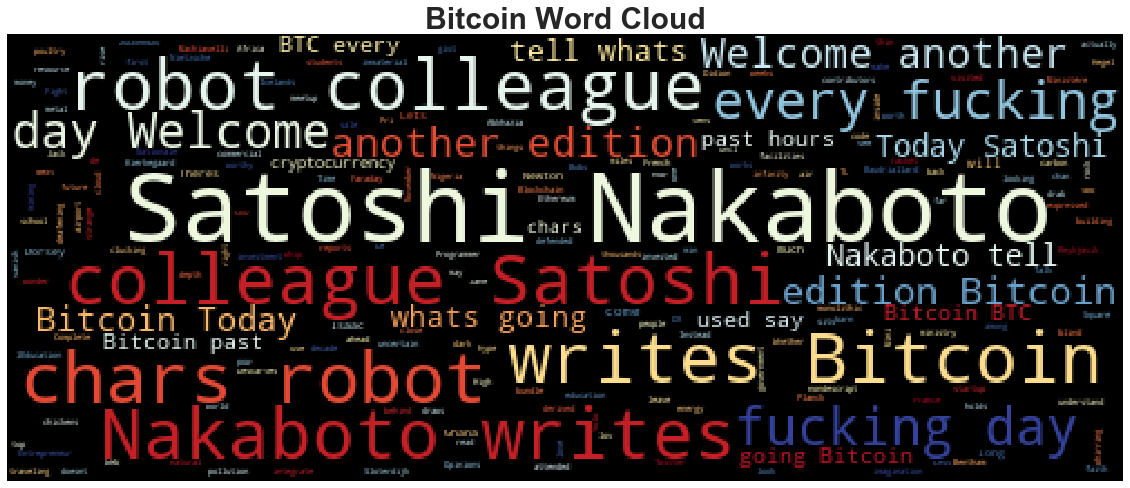

In [44]:
# Generate the Bitcoin word cloud
def wordcloud(text, title=""):
    df_cloud = WordCloud(width=500, colormap='RdYlBu').generate(text)
    plt.imshow(df_cloud)
    plt.axis("off")
    fontdict = {"fontsize": 30, "fontweight" : "bold"}
    plt.title(title, fontdict=fontdict)
    plt.show()
wordcloud(btc.text.str.cat(), title="Bitcoin Word Cloud")

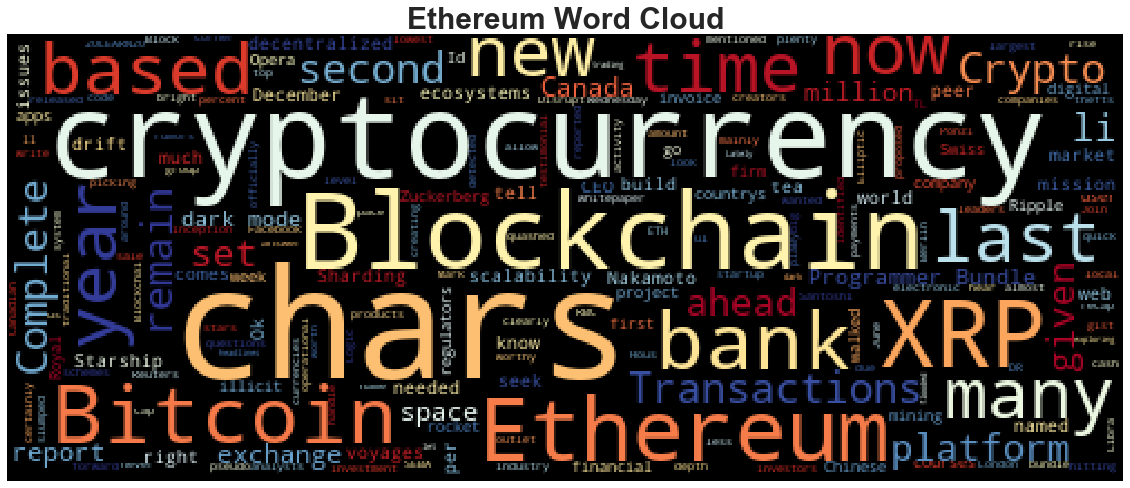

In [45]:
# Generate the Ethereum word cloud
wordcloud(eth.text.str.cat(), title="Ethereum Word Cloud")

# Named Entity Recognition

In this section, you will build a named entity recognition model for both coins and visualize the tags using SpaCy.

In [63]:
import spacy
from spacy import displacy

In [64]:
# Optional - download a language model for SpaCy
# !python -m spacy download en_core_web_sm

In [65]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

## Bitcoin NER

In [73]:


# Concatenate all of the bitcoin text together
concat_btc = btc.text.str.cat()
concat_btc



"Less than two miles from Icelands Reykjavik airport sits a nondescript metal building as monolithic and drab as a commercial poultry barn. Theres a deafening racket inside, too, but it doesnt come from clucking chickens. Instead, tens of thousands of whirring… [+3426 chars]Whether Bitcoin, an immaterial resource derived from hype and blind faith, will vanish into thin air is uncertain, but it will leave behind a dark cloud of carbon pollution. Cryptocurrency mining facilities use so much energy that the government of Abkhazia c… [+3402 chars]High school students in France may be among the first people in the world to actually understand how cryptocurrency works. \r\nThe Next Web reports that the French education ministry, Le Ministère de lÉducation Nationale, will integrate cryptocurrency into its … [+1439 chars]TL;DR: The in-depth Complete Blockchain and Ethereum Programmer bundle is on sale for just $24 with the code 20LEARN20.\r\nWhen it comes to Bitcoin, you get the gist: Cryptocu

In [74]:
# Run the NER processor on all of the text
doc = nlp(all_btc_text)

# Add a title to the document
doc.user_data["title"] = "Bitcoin NER"

In [75]:
# Render the visualization
displacy.render(doc, style='ent', jupyter=True)

In [76]:
# List all Entities
for ent in doc.ents:
    print(ent.text, ent.label_)

Less than two miles QUANTITY
Icelands Reykjavik FAC
tens of thousands CARDINAL
Abkhazia c ORG
France GPE
first ORDINAL
French NORP
Le Ministère de lÉducation Nationale ORG
Complete Blockchain and Ethereum Programmer ORG
just $24 MONEY
20LEARN20 CARDINAL
Bitcoin GPE
+1491 chars]Our NORP
Satoshi Nakaboto PERSON
Bitcoin GPE
Bitcoin GPE
Today DATE
Satoshi Nakaboto PERSON
Bitcoin GPE
the past 24 hours TIME
Baudriallard PERSON
only one CARDINAL
Satoshi Nakaboto PERSON
Bitcoin GPE
Bitcoin GPE
Today DATE
Satoshi Nakaboto PERSON
Bitcoin GPE
the past 24 hours TIME
Machiavelli PERSON
Satoshi Nakaboto PERSON
Bitcoin GPE
Bitcoin GPE
Today DATE
Satoshi Nakaboto PERSON
Bitcoin GPE
the past 24 hours TIME
Nietzsche PERSON
Time ORG
Satoshi Nakaboto PERSON
Bitcoin GPE
Bitcoin GPE
Today DATE
Satoshi Nakaboto PERSON
Bitcoin GPE
the past 24 hours TIME
Isaac Newton PERSON
Jack Dorsey PERSON
Bitcoin GPE
Ghana GPE
just weeks DATE
Dorsey PERSON
Bitcoin GPE
Africa LOC
Nigeria GPE
Ghana GPE
Satoshi Nakaboto PERSO

---

## Ethereum NER

In [77]:
# Concatenate all of the Ethereum text together
concatenate_eth = eth.text.str.cat()
concatenate_eth 

"Sharding and scalability. Transactions per second.\xa0\xa0Crypto-ecosystems. The\xa0decentralized web. These are the\xa0voyages of the Starship Blockchain, on its 5-year mission to seek out Ok, you get the drift! But as you can tell,\xa0there remain many, many issues to tea… [+3851 chars]TL;DR: The in-depth Complete Blockchain and Ethereum Programmer bundle is on sale for just $24 with the code 20LEARN20.\r\nWhen it comes to Bitcoin, you get the gist: Cryptocurrency is on the rise right now, it's a worthy investment, and it when it comes to top… [+1491 chars]Disrupt Berlin is right around the corner. And there is plenty to look forward to.\r\nJoin us December 11 and December 12 to hear from industry leaders, investors, and bright stars in the startup world. We’ll sit down with CEOs from big-name companies such as A… [+14834 chars]he plaBy now, you should almost certainly know about Ethereum, ETH the second largest cryptocurrency by market cap. But if you needed a quick recap, here it 

In [78]:
# Run the NER processor on all of the text
eth_doc = nlp(all_eth_text)

# Add a title to the document
eth_doc.user_data["title"] = "Ethereum NER"

In [79]:
# Render the visualization
displacy.render(eth_doc, style='ent', jupyter=True)

In [80]:
# List all Entities
for ent in eth_doc.ents:
    print(ent.text, ent.label_)

second ORDINAL
the Starship Blockchain LOC
Complete Blockchain PERSON
Ethereum Programmer ORG
just $24 MONEY
20LEARN20 CARDINAL
Bitcoin GPE
Berlin GPE
December 11 and December 12 DATE
ETH ORG
second ORDINAL
the year 2009 DATE
Santoshi Nakamoto PERSON
Nakamoto ORG
Bitcoin PERSON
Blockchai GPE
Bitcoin GPE
as much as 9% PERCENT
Wednesday DATE
June DATE
Facebook ORG
Mark Zuckerberg's PERSON
Libra GPE
Zuckerberg PERSON
chars]A Swiss bank ORG
Swiss NORP
Block PERSON
$400 million MONEY
Ripple XRP PERSON
XRP ORG
Ponzi PERSON
XRP ORG
London GPE
less than 0.2 percent PERCENT
XRP ORG
chars]The Royal Bank of Canada ORG
Last week DATE
Canadian NORP
The Logic WORK_OF_ART
The Royal Bank of Canada ORG
Opera PERSON
one CARDINAL
Opera Mobile ORG
the day DATE
six CARDINAL
Bitcoin GPE
XRP PERSON
third ORDINAL
Blockchain GPE
Bitcoin GPE
the Complete Blockchain and Ethereum Programmer Bundle ORG
just $29 MONEY
Bejing ORG
first ORDINAL
public last week DATE
Chinese NORP
2021 DATE
last year DATE
Chinese NORP
